## Webscraping

In [3]:
import requests
import time 
import pandas as pd
import re

In [4]:
# url = 'https://api.pushshift.io/reddit/submission/search'
# dfs = []
# loops = 20
# subreddit = 'startrek'
# start_time = time.time()
# params = {
#     'subreddit': subreddit,
#     'size': 100,
#     'before': round(start_time)
#     }
# for i in range(loops):
#     current_time = time.time()
#     #requesting data
#     res = requests.get(url, params)
#     print(f'res {i+1} code: ', res.status_code)
#     data = res.json()
#     posts = data['data']
#     post_df = pd.DataFrame(posts)
#     dfs.append(post_df)
#     #get oldest post time and use as before parameter in next request
#     oldest = post_df['created_utc'].min()
#     params['before'] = oldest
#     time.sleep(1)
# reddit_posts = pd.concat(dfs)

# filename = subreddit + '_submission.csv'
# reddit_posts.to_csv('./datasets/' + filename, index=False)

In [5]:
# url = 'https://api.pushshift.io/reddit/submission/search'
# dfs = []
# loops = 20
# subreddit = 'starwars'
# start_time = time.time()
# params = {
#     'subreddit': subreddit,
#     'size': 100,
#     'before': round(start_time)
#     }
# for i in range(loops):
#     current_time = time.time()
#     #requesting data
#     res = requests.get(url, params)
#     print(f'res {i+1} code: ', res.status_code)
#     data = res.json()
#     posts = data['data']
#     post_df = pd.DataFrame(posts)
#     dfs.append(post_df)
#     #get oldest post time and use as before parameter in next request
#     oldest = post_df['created_utc'].min()
#     params['before'] = oldest
#     time.sleep(1)
# reddit_posts = pd.concat(dfs)

# filename = subreddit + '_submission.csv'
# reddit_posts.to_csv('./datasets/' + filename, index=False)

In [6]:
# url = 'https://api.pushshift.io/reddit/comment/search'
# dfs = []
# loops = 20
# subreddit = 'starwars'
# start_time = time.time()
# params = {
#     'subreddit': subreddit,
#     'size': 100,
#     'before': round(start_time)
#     }
# for i in range(loops):
#     current_time = time.time()
#     #requesting data
#     res = requests.get(url, params)
#     print(f'res {i+1} code: ', res.status_code)
#     data = res.json()
#     posts = data['data']
#     post_df = pd.DataFrame(posts)
#     dfs.append(post_df)
#     #get oldest post time and use as before parameter in next request
#     oldest = post_df['created_utc'].min()
#     params['before'] = oldest
#     time.sleep(1)
# reddit_posts = pd.concat(dfs)

# filename = subreddit + '_comments.csv'
# reddit_posts.to_csv('./datasets/' + filename, index=False)

In [7]:
# url = 'https://api.pushshift.io/reddit/comment/search'
# dfs = []
# loops = 20
# subreddit = 'startrek'
# start_time = time.time()
# params = {
#     'subreddit': subreddit,
#     'size': 100,
#     'before': round(start_time)
#     }
# for i in range(loops):
#     current_time = time.time()
#     #requesting data
#     res = requests.get(url, params)
#     print(f'res {i+1} code: ', res.status_code)
#     data = res.json()
#     posts = data['data']
#     post_df = pd.DataFrame(posts)
#     dfs.append(post_df)
#     #get oldest post time and use as before parameter in next request
#     oldest = post_df['created_utc'].min()
#     params['before'] = oldest
#     time.sleep(1)
# reddit_posts = pd.concat(dfs)

# filename = subreddit + '_comments.csv'
# reddit_posts.to_csv('./datasets/' + filename, index=False)

--------------------------------------------

## Cleaning the data

In [8]:
startrek_comments = pd.read_csv('./datasets/startrek_comments.csv')
starwars_comments = pd.read_csv('./datasets/starwars_comments.csv')
startrek_submission = pd.read_csv('./datasets/startrek_submission.csv')
starwars_submission = pd.read_csv('./datasets/starwars_submission.csv')

startrek_submission = startrek_submission[['subreddit', 'selftext', 'title']]
starwars_submission = starwars_submission[['subreddit', 'selftext', 'title']]
startrek_comments = startrek_comments[['subreddit','body']]
starwars_comments = starwars_comments[['subreddit','body']]

starwars_comments['subreddit'] = starwars_comments['subreddit'].str.lower()
starwars_submission['subreddit'] = starwars_submission['subreddit'].str.lower()

comments = pd.concat([startrek_comments, starwars_comments], 
                     ignore_index=True)

submissions = pd.concat([starwars_submission, startrek_submission], 
                        ignore_index=True)



Let's use a few regular expressions to clean up our data

In [9]:
submissions['selftext'].fillna('', inplace=True)

In [10]:
submissions['all'] = submissions['selftext'] + submissions['title']

In [11]:
# def standardize_text(df, text_field):
#     df[text_field] = df[text_field].str.replace(r"removed",'')
#     # From the notebook provided by Emmanuel Ameisen on medium 
#     df[text_field] = df[text_field].str.replace(r"http\S+", "")
#     df[text_field] = df[text_field].str.replace(r"http", "")
#     df[text_field] = df[text_field].str.replace(r"@\S+", "")
#     df[text_field] = df[text_field].str.replace(r"@", "at")
#     df[text_field] = [re.sub(r'\W', ' ', df[text_field][i]) for i in df[text_field].index]  # Remove all the special characters
#     df[text_field] = [re.sub(r'\^[a-zA-Z]\s+', ' ', df[text_field][i]) for i in df[text_field].index] # Remove single characters from the start
#     df[text_field] = [re.sub(r"[\.\(\),\^\[\]\!\?\@\'\`\"\_\n]", "", df[text_field][i]) for i in df[text_field].index]
#     df[text_field] = [re.sub(r'\s+[a-zA-Z]\s+', ' ', df[text_field][i]) for i in df[text_field].index] # remove all single characters
#     df[text_field] = df[text_field].str.lower()

#     return df

In [12]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"removed",'')
    # From the notebook provided by Emmanuel Ameisen on medium 
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace('[^\w\s]',' ') # from James gets rid of special characters. 
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = [re.sub(r"[\.\(\),\^\[\]\!\?\@\'\`\"\_\n]", "", df[text_field][i]) for i in df[text_field].index]
    df[text_field] = df[text_field].str.lower()

    return df

# An NLP workshop by Emmanuel Ameisen (@EmmanuelAmeisen), from Insight AI

In [13]:
submissions = standardize_text(submissions, 'all')
comments = standardize_text(comments, 'body')
submissions

,subreddit,selftext,title,all
0,starwars,I've seen several novelizations of the main 6 ...,Which novelizations of 1-6 are the best?,i ve seen several novelizations of the main 6 ...
1,starwars,"I posted this as a comment in another thread, ...",My theory on how the Force works,i posted this as a comment in another thread ...
2,starwars,I would like a mace windu show showing his jou...,Mace Windu and Palpatine Shows,i would like a mace windu show showing his jou...
3,starwars,1.The OT is basically reverted\n\n \-The Galax...,The REAL problem with the Sequels that no one ...,1 the ot is basically reverted the galaxy is...
4,starwars,Me?\nLili Mirojnick,Who'd you get to play Princess Leia from today...,me lili mirojnickwho d you get to play princes...
...,...,...,...,...
3995,startrek,,I love this speech,i love this speech
3996,startrek,Is there some reason that they can't replicate...,Spore drive question,is there some reason that they can t replicate...
3997,startrek,,There are 791 episodes of Star Trek altogether...,there are 791 episodes of star trek altogether...
3998,startrek,,When an unauthorized officer is in your Captai...,when an unauthorized officer is in your captai...


In [14]:
comments['subreddit'] = comments['subreddit'].map({'startrek':0,'starwars':1})
submissions['subreddit'] = submissions['subreddit'].map({'startrek':0,'starwars':1})

In [15]:
comments['body']=comments['body'].astype(str)
submissions['title']=submissions['title'].astype(str)
submissions['selftext']=submissions['selftext'].astype(str)
submissions['all']=submissions['all'].astype(str)

In [16]:
comments.isnull().sum()

subreddit    0
body         0
dtype: int64

In [17]:
submissions.isnull().sum()


subreddit    0
selftext     0
title        0
all          0
dtype: int64

In [18]:
submissions.to_pickle('./datasets/submissions.pkl')
comments.to_pickle('./datasets/comments.pkl')

In [19]:
submissions['subreddit'].value_counts()

1    2000
0    2000
Name: subreddit, dtype: int64

#### Removing Outliers

In [20]:
# for i, x in enumerate(lsa_scores[:,1]):
#     if x > 125:
        
#         print(i,x)
        
# for i, x in enumerate(lsa_scores[:,0]):
#     if x > 125:
        
#         print(i,x)

NameError: name 'lsa_scores' is not defined

------------------------------------------------------------------------------------------------

## Tokenize, Lemmatize and Stemming, Sentiment Analysis, and Stopwords

In [22]:
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re
import seaborn as sns


# import nltk 
from nltk.stem.snowball import SnowballStemmer 
  
# #the stemmer requires a language parameter 
snow_stemmer = SnowballStemmer(language='english')

In [23]:
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer(r'\w+') 
# Instantiate tokenizer.
tokenizer_1 = RegexpTokenizer('\w+|\$[\d\.]+|S+')

# "Run" Tokenizer
comments['tokens'] = comments['body'].apply(tokenizer_1.tokenize)
submissions["tokens"] = submissions["all"].apply(tokenizer_1.tokenize)

#### Now lets Regularize Expressions
This is important because it is a helpful tool in detecting patterns

In [24]:
submissions['tokens']

0       [i, ve, seen, several, novelizations, of, the,...
1       [i, posted, this, as, a, comment, in, another,...
2       [i, would, like, a, mace, windu, show, showing...
3       [1, the, ot, is, basically, reverted, the, gal...
4       [me, lili, mirojnickwho, d, you, get, to, play...
                              ...                        
3995                              [i, love, this, speech]
3996    [is, there, some, reason, that, they, can, t, ...
3997    [there, are, 791, episodes, of, star, trek, al...
3998    [when, an, unauthorized, officer, is, in, your...
3999    [preface, i, love, love, love, ds9, as, it, wa...
Name: tokens, Length: 4000, dtype: object

## Lemmatizing & Stemming

- "He is *running* really fast!"
- "He *ran* the race."
- "He *runs* a five-minute mile."

If we wanted a computer to interpret these sentences, I might count up how many times I see each word. The computer will treat words like "running," "ran," and "runs" differently... but they mean very similar things (in this context)!

**Lemmatizing** and **stemming** are two forms of shortening words so we can combine similar forms of the same word.

When we "**lemmatize**" data, we take words and attempt to return their *lemma*, or the base/dictionary form of a word.

In [25]:
# Instantiate Lemmatizer.
lemmatizer = WordNetLemmatizer()

lem_array = []
for i in submissions.index:
    lem_list = []
    for word in submissions['tokens'][i]:
        lem_list.append(lemmatizer.lemmatize(word))
    lem_array.append(lem_list)


submissions['lems'] = lem_array

In [26]:
# Instigate PorterStemmer
p_stemmer = PorterStemmer()

# Actually screw Porter, its old, lets do snowball stemmer. 

stem_array = []
for i in submissions.index:
    stem_list = []
    for word in submissions['tokens'][i]:
        stem_list.append(snow_stemmer.stem(word))
    stem_array.append(stem_list)

submissions['stems'] = stem_array

In [27]:
submissions

,subreddit,selftext,title,all,tokens,lems,stems
0,1,I've seen several novelizations of the main 6 ...,Which novelizations of 1-6 are the best?,i ve seen several novelizations of the main 6 ...,"[i, ve, seen, several, novelizations, of, the,...","[i, ve, seen, several, novelization, of, the, ...","[i, ve, seen, sever, novel, of, the, main, 6, ..."
1,1,"I posted this as a comment in another thread, ...",My theory on how the Force works,i posted this as a comment in another thread ...,"[i, posted, this, as, a, comment, in, another,...","[i, posted, this, a, a, comment, in, another, ...","[i, post, this, as, a, comment, in, anoth, thr..."
2,1,I would like a mace windu show showing his jou...,Mace Windu and Palpatine Shows,i would like a mace windu show showing his jou...,"[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, show, h..."
3,1,1.The OT is basically reverted\n\n \-The Galax...,The REAL problem with the Sequels that no one ...,1 the ot is basically reverted the galaxy is...,"[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basic, revert, the, galaxi, i..."
4,1,Me?\nLili Mirojnick,Who'd you get to play Princess Leia from today...,me lili mirojnickwho d you get to play princes...,"[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play..."
...,...,...,...,...,...,...,...
3995,0,,I love this speech,i love this speech,"[i, love, this, speech]","[i, love, this, speech]","[i, love, this, speech]"
3996,0,Is there some reason that they can't replicate...,Spore drive question,is there some reason that they can t replicate...,"[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ..."
3997,0,,There are 791 episodes of Star Trek altogether...,there are 791 episodes of star trek altogether...,"[there, are, 791, episodes, of, star, trek, al...","[there, are, 791, episode, of, star, trek, alt...","[there, are, 791, episod, of, star, trek, alto..."
3998,0,,When an unauthorized officer is in your Captai...,when an unauthorized officer is in your captai...,"[when, an, unauthorized, officer, is, in, your...","[when, an, unauthorized, officer, is, in, your...","[when, an, unauthor, offic, is, in, your, capt..."


## Stop Word Removal

In [28]:
stop = stopwords.words('english')
puncts = ['!', ',', '\'', '\"', ',', "\'", '\;']
stop.extend(puncts)

In [29]:
stem_stop = []
for word in stop:
    stem_stop.append(snow_stemmer.stem(word))


In [30]:
# Print only those stemmed tokens that are different.
for a, b in zip(stem_stop, stop):
    if a != b:
        print(a + " - " + b)

our - ours
ourselv - ourselves
you'r - you're
you'v - you've
your - yours
yourselv - yourselves
she - she's
her - hers
it - it's
it - its
their - theirs
themselv - themselves
be - being
have - having
doe - does
do - doing
becaus - because
dure - during
befor - before
abov - above
onc - once
whi - why
ani - any
onli - only
veri - very
should'v - should've


In [31]:
stop_array = []

for i in submissions.index:
    
    stop_list = []
    #remove stop words from stems list. that must be done with the stems.
    
    for item in submissions['stems'][i]:
        if item not in stem_stop: # Stem_stop are the stop words inside the stems. 
            stop_list.append(item) #These are the words not stop words
    stop_array.append(stop_list) 
    
submissions['nostop_stem'] = stop_array

In [32]:
stop_array = []

for i in submissions.index:
    
    stop_list = []
    #remove stop words from lems list. that must be done with the lems.
    
    for item in submissions['lems'][i]:
        if item not in stop: # stop are the stop words. 
            stop_list.append(item) #These are the words not stop words
    stop_array.append(stop_list) 
    
submissions['nostop_lems'] = stop_array
submissions

,subreddit,selftext,title,all,tokens,lems,stems,nostop_stem,nostop_lems
0,1,I've seen several novelizations of the main 6 ...,Which novelizations of 1-6 are the best?,i ve seen several novelizations of the main 6 ...,"[i, ve, seen, several, novelizations, of, the,...","[i, ve, seen, several, novelization, of, the, ...","[i, ve, seen, sever, novel, of, the, main, 6, ...","[seen, sever, novel, main, 6, movi, never, fig...","[seen, several, novelization, main, 6, movie, ..."
1,1,"I posted this as a comment in another thread, ...",My theory on how the Force works,i posted this as a comment in another thread ...,"[i, posted, this, as, a, comment, in, another,...","[i, posted, this, a, a, comment, in, another, ...","[i, post, this, as, a, comment, in, anoth, thr...","[post, comment, anoth, thread, kinda, got, bur...","[posted, comment, another, thread, kinda, got,..."
2,1,I would like a mace windu show showing his jou...,Mace Windu and Palpatine Shows,i would like a mace windu show showing his jou...,"[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, show, h...","[would, like, mace, windu, show, show, journey...","[would, like, mace, windu, show, showing, jour..."
3,1,1.The OT is basically reverted\n\n \-The Galax...,The REAL problem with the Sequels that no one ...,1 the ot is basically reverted the galaxy is...,"[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basic, revert, the, galaxi, i...","[1, ot, basic, revert, galaxi, left, reveng, s...","[1, ot, basically, reverted, galaxy, left, rev..."
4,1,Me?\nLili Mirojnick,Who'd you get to play Princess Leia from today...,me lili mirojnickwho d you get to play princes...,"[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[lili, mirojnickwho, get, play, princess, leia...","[lili, mirojnickwho, get, play, princess, leia..."
...,...,...,...,...,...,...,...,...,...
3995,0,,I love this speech,i love this speech,"[i, love, this, speech]","[i, love, this, speech]","[i, love, this, speech]","[love, speech]","[love, speech]"
3996,0,Is there some reason that they can't replicate...,Spore drive question,is there some reason that they can t replicate...,"[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ...","[reason, replic, technolog, futur, futur, star...","[reason, replicate, technology, future, future..."
3997,0,,There are 791 episodes of Star Trek altogether...,there are 791 episodes of star trek altogether...,"[there, are, 791, episodes, of, star, trek, al...","[there, are, 791, episode, of, star, trek, alt...","[there, are, 791, episod, of, star, trek, alto...","[791, episod, star, trek, altogeth, count, cou...","[791, episode, star, trek, altogether, countin..."
3998,0,,When an unauthorized officer is in your Captai...,when an unauthorized officer is in your captai...,"[when, an, unauthorized, officer, is, in, your...","[when, an, unauthorized, officer, is, in, your...","[when, an, unauthor, offic, is, in, your, capt...","[unauthor, offic, captain, chair, cute, remov,...","[unauthorized, officer, captain, chair, cute, ..."


## Word Frequencies & POS Tagging

In [33]:
# Now i must pull out all the nostop_stems and combine them for each subreddit,
# then see what the most common words are in each subreddit
star_trek_stems = []
star_wars_stems = []

for i in submissions.index:

    
    #star trek = 0 , so these are all the star trek stem words. 
    if submissions['subreddit'][i] ==0:
        star_trek_stems.append(submissions['nostop_stem'][i])
    #star wars = 1 , so these are all the star wars stem words. 
    if submissions['subreddit'][i] ==1:
        star_wars_stems.append(submissions['nostop_stem'][i])
        

trek_comp = []        
for wordlist in star_trek_stems:
    w1 = ' '.join(wordlist)
    trek_comp.append(w1)
all_trek_stems = ' '.join(trek_comp)

wars_comp = []
for wordlist in star_wars_stems:
    w2 = ' '.join(wordlist)
    wars_comp.append(w2)
all_wars_stems = ' '.join(wars_comp)

In [34]:
# Now i must pull out all the nostop_lems and combine them for each subreddit,
# then see what the most common words are in each subreddit
star_trek_lems = []
star_wars_lems = []

for i in submissions.index:

    
    #star trek = 0 , so these are all the star trek stem words. 
    if submissions['subreddit'][i] ==0:
        star_trek_lems.append(submissions['nostop_lems'][i])
    #star wars = 1 , so these are all the star wars stem words. 
    if submissions['subreddit'][i] ==1:
        star_wars_lems.append(submissions['nostop_lems'][i])
        

trek_comp = []        
for wordlist in star_trek_lems:
    w1 = ' '.join(wordlist)
    trek_comp.append(w1)
all_trek_lems = ' '.join(trek_comp)

wars_comp = []
for wordlist in star_wars_lems:
    w2 = ' '.join(wordlist)
    wars_comp.append(w2)
all_wars_lems = ' '.join(wars_comp)

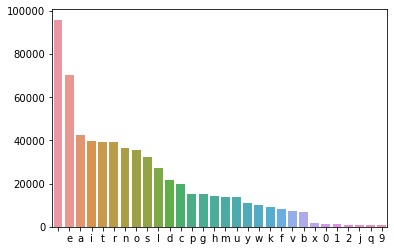

In [35]:
freqs = FreqDist(all_trek_lems).most_common(30)

x= [x[0] for x in freqs]
y= [x[1] for x in freqs]

sns.barplot(x=x, y=y);

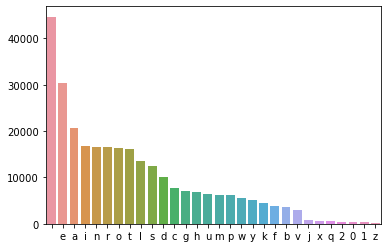

In [36]:
freqs = FreqDist(all_wars_lems).most_common(30)

x= [x[0] for x in freqs]
y= [x[1] for x in freqs]

sns.barplot(x=x, y=y);

Wow this tells me nothing ! It is time we look at this another way. Let's begin our models and find the words with the highest coorelations to their classes and go from there. 

In [37]:
submissions.to_csv('./datasets/cleaned_submissions.csv')

---------------------------

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

np.random.seed(824)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import codecs

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

In [39]:
submissions.drop(['selftext', 'title'], axis=1, inplace=True)

In [40]:
submissions

,subreddit,all,tokens,lems,stems,nostop_stem,nostop_lems
0,1,i ve seen several novelizations of the main 6 ...,"[i, ve, seen, several, novelizations, of, the,...","[i, ve, seen, several, novelization, of, the, ...","[i, ve, seen, sever, novel, of, the, main, 6, ...","[seen, sever, novel, main, 6, movi, never, fig...","[seen, several, novelization, main, 6, movie, ..."
1,1,i posted this as a comment in another thread ...,"[i, posted, this, as, a, comment, in, another,...","[i, posted, this, a, a, comment, in, another, ...","[i, post, this, as, a, comment, in, anoth, thr...","[post, comment, anoth, thread, kinda, got, bur...","[posted, comment, another, thread, kinda, got,..."
2,1,i would like a mace windu show showing his jou...,"[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, show, h...","[would, like, mace, windu, show, show, journey...","[would, like, mace, windu, show, showing, jour..."
3,1,1 the ot is basically reverted the galaxy is...,"[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basic, revert, the, galaxi, i...","[1, ot, basic, revert, galaxi, left, reveng, s...","[1, ot, basically, reverted, galaxy, left, rev..."
4,1,me lili mirojnickwho d you get to play princes...,"[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[lili, mirojnickwho, get, play, princess, leia...","[lili, mirojnickwho, get, play, princess, leia..."
...,...,...,...,...,...,...,...
3995,0,i love this speech,"[i, love, this, speech]","[i, love, this, speech]","[i, love, this, speech]","[love, speech]","[love, speech]"
3996,0,is there some reason that they can t replicate...,"[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ...","[reason, replic, technolog, futur, futur, star...","[reason, replicate, technology, future, future..."
3997,0,there are 791 episodes of star trek altogether...,"[there, are, 791, episodes, of, star, trek, al...","[there, are, 791, episode, of, star, trek, alt...","[there, are, 791, episod, of, star, trek, alto...","[791, episod, star, trek, altogeth, count, cou...","[791, episode, star, trek, altogether, countin..."
3998,0,when an unauthorized officer is in your captai...,"[when, an, unauthorized, officer, is, in, your...","[when, an, unauthorized, officer, is, in, your...","[when, an, unauthor, offic, is, in, your, capt...","[unauthor, offic, captain, chair, cute, remov,...","[unauthorized, officer, captain, chair, cute, ..."


In [41]:
submissions['word_count']=[len(submissions['nostop_lems'][i]) for i in submissions.index]

In [42]:
submissions.head()

,subreddit,all,tokens,lems,stems,nostop_stem,nostop_lems,word_count
0,1,i ve seen several novelizations of the main 6 ...,"[i, ve, seen, several, novelizations, of, the,...","[i, ve, seen, several, novelization, of, the, ...","[i, ve, seen, sever, novel, of, the, main, 6, ...","[seen, sever, novel, main, 6, movi, never, fig...","[seen, several, novelization, main, 6, movie, ...",23
1,1,i posted this as a comment in another thread ...,"[i, posted, this, as, a, comment, in, another,...","[i, posted, this, a, a, comment, in, another, ...","[i, post, this, as, a, comment, in, anoth, thr...","[post, comment, anoth, thread, kinda, got, bur...","[posted, comment, another, thread, kinda, got,...",226
2,1,i would like a mace windu show showing his jou...,"[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, show, h...","[would, like, mace, windu, show, show, journey...","[would, like, mace, windu, show, showing, jour...",54
3,1,1 the ot is basically reverted the galaxy is...,"[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basic, revert, the, galaxi, i...","[1, ot, basic, revert, galaxi, left, reveng, s...","[1, ot, basically, reverted, galaxy, left, rev...",176
4,1,me lili mirojnickwho d you get to play princes...,"[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[lili, mirojnickwho, get, play, princess, leia...","[lili, mirojnickwho, get, play, princess, leia...",9


In [43]:
sia = SentimentIntensityAnalyzer()
def get_compound_sentiment(post):
    return sia.polarity_scores(post)['compound']

In [44]:
submissions['sentiment'] = submissions['all'].apply(get_compound_sentiment)
submissions.head()

,subreddit,all,tokens,lems,stems,nostop_stem,nostop_lems,word_count,sentiment
0,1,i ve seen several novelizations of the main 6 ...,"[i, ve, seen, several, novelizations, of, the,...","[i, ve, seen, several, novelization, of, the, ...","[i, ve, seen, sever, novel, of, the, main, 6, ...","[seen, sever, novel, main, 6, movi, never, fig...","[seen, several, novelization, main, 6, movie, ...",23,0.9657
1,1,i posted this as a comment in another thread ...,"[i, posted, this, as, a, comment, in, another,...","[i, posted, this, a, a, comment, in, another, ...","[i, post, this, as, a, comment, in, anoth, thr...","[post, comment, anoth, thread, kinda, got, bur...","[posted, comment, another, thread, kinda, got,...",226,0.9790
2,1,i would like a mace windu show showing his jou...,"[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, show, h...","[would, like, mace, windu, show, show, journey...","[would, like, mace, windu, show, showing, jour...",54,0.9667
3,1,1 the ot is basically reverted the galaxy is...,"[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basic, revert, the, galaxi, i...","[1, ot, basic, revert, galaxi, left, reveng, s...","[1, ot, basically, reverted, galaxy, left, rev...",176,-0.9959
4,1,me lili mirojnickwho d you get to play princes...,"[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[lili, mirojnickwho, get, play, princess, leia...","[lili, mirojnickwho, get, play, princess, leia...",9,0.3400


**FunctionTransformers**

In [45]:
submissions

,subreddit,all,tokens,lems,stems,nostop_stem,nostop_lems,word_count,sentiment
0,1,i ve seen several novelizations of the main 6 ...,"[i, ve, seen, several, novelizations, of, the,...","[i, ve, seen, several, novelization, of, the, ...","[i, ve, seen, sever, novel, of, the, main, 6, ...","[seen, sever, novel, main, 6, movi, never, fig...","[seen, several, novelization, main, 6, movie, ...",23,0.9657
1,1,i posted this as a comment in another thread ...,"[i, posted, this, as, a, comment, in, another,...","[i, posted, this, a, a, comment, in, another, ...","[i, post, this, as, a, comment, in, anoth, thr...","[post, comment, anoth, thread, kinda, got, bur...","[posted, comment, another, thread, kinda, got,...",226,0.9790
2,1,i would like a mace windu show showing his jou...,"[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, showing...","[i, would, like, a, mace, windu, show, show, h...","[would, like, mace, windu, show, show, journey...","[would, like, mace, windu, show, showing, jour...",54,0.9667
3,1,1 the ot is basically reverted the galaxy is...,"[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basically, reverted, the, gal...","[1, the, ot, is, basic, revert, the, galaxi, i...","[1, ot, basic, revert, galaxi, left, reveng, s...","[1, ot, basically, reverted, galaxy, left, rev...",176,-0.9959
4,1,me lili mirojnickwho d you get to play princes...,"[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[me, lili, mirojnickwho, d, you, get, to, play...","[lili, mirojnickwho, get, play, princess, leia...","[lili, mirojnickwho, get, play, princess, leia...",9,0.3400
...,...,...,...,...,...,...,...,...,...
3995,0,i love this speech,"[i, love, this, speech]","[i, love, this, speech]","[i, love, this, speech]","[love, speech]","[love, speech]",2,0.6369
3996,0,is there some reason that they can t replicate...,"[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ...","[is, there, some, reason, that, they, can, t, ...","[reason, replic, technolog, futur, futur, star...","[reason, replicate, technology, future, future...",10,0.0000
3997,0,there are 791 episodes of star trek altogether...,"[there, are, 791, episodes, of, star, trek, al...","[there, are, 791, episode, of, star, trek, alt...","[there, are, 791, episod, of, star, trek, alto...","[791, episod, star, trek, altogeth, count, cou...","[791, episode, star, trek, altogether, countin...",21,0.0000
3998,0,when an unauthorized officer is in your captai...,"[when, an, unauthorized, officer, is, in, your...","[when, an, unauthorized, officer, is, in, your...","[when, an, unauthor, offic, is, in, your, capt...","[unauthor, offic, captain, chair, cute, remov,...","[unauthorized, officer, captain, chair, cute, ...",11,0.6124


In [54]:
# create functions to return just the columns that you care about
get_text_data = FunctionTransformer(lambda x: x['all'], validate = False)
get_numeric_data = FunctionTransformer(lambda x: x[['word_count', 'sentiment']], validate = False)

In [55]:

X = submissions[['all', 'word_count','sentiment']]
y = submissions['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)


pipe = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('ss', StandardScaler())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('cvec', CountVectorizer())
            ]))
    ])),
    ('logreg', LogisticRegression())
])

params = {
            'features__text_features__cvec__stop_words' : [None, 'english'],
            'logreg__penalty' : ['l1', 'l2']
}

gs = GridSearchCV(pipe, params, cv=5)

gs.fit(X_train, y_train)
gs.score(X_train, y_train)

0.985625

In [56]:
print(gs.score(X_test, y_test))

0.93125


In [86]:
gs.best_params_

{'features__text_features__cvec__stop_words': 'english',
 'logreg__penalty': 'l2'}


### Visualizing the embeddings
Now that we've created embeddings, let's visualize them and see if we can identify some structure. In a perfect world, our embeddings would be so distinct that are two classes would be perfectly separated. Since visualizing data in 20k dimensions is hard, let's project it down to 2.

In [58]:
cv = CountVectorizer(min_df=0.01, stop_words='english')
XX_train_counts = cv.fit_transform(X_train['all'])
XX_test_counts = cv.transform(X_test['all'])

datafrog = pd.DataFrame(XX_train_counts.todense(), columns=cv.get_feature_names())

In [59]:
datafrog

,10,12,2020,2021,able,absolutely,action,actors,actual,actually,...,wouldn,writers,writing,written,wrong,x200b,year,years,yes,yoda
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
SVD = TruncatedSVD(n_components=10)
svd_matrix = SVD.fit_transform(datafrog)
svd_matrix.shape

(3200, 10)

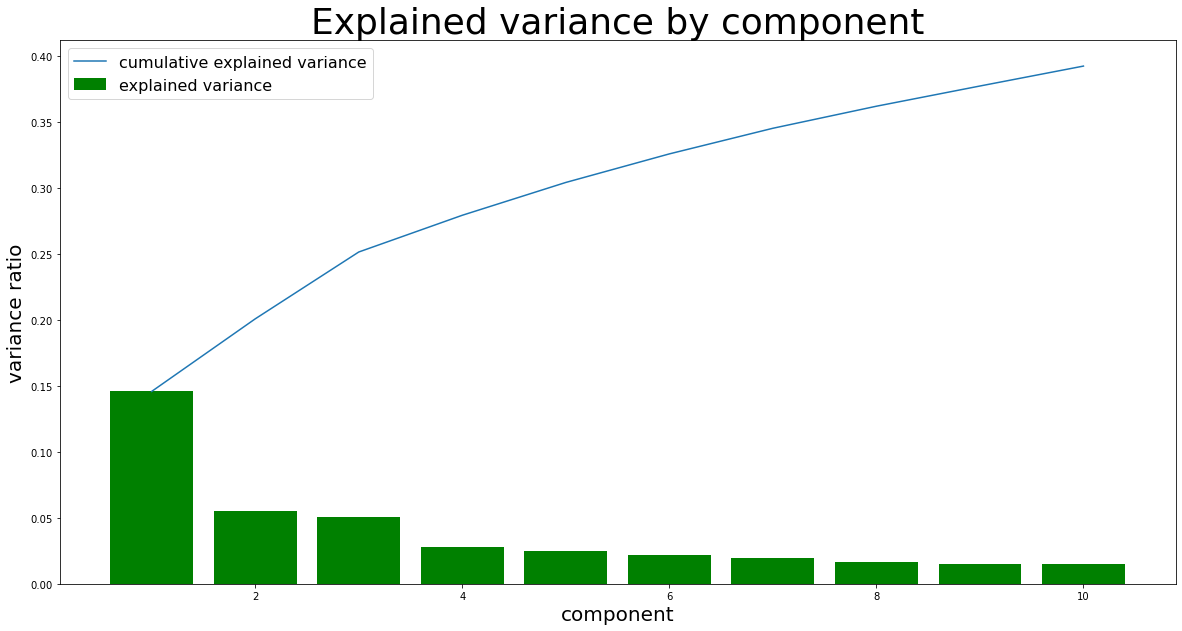

In [61]:
fig = plt.figure(figsize=(20,10))
plt.bar(np.array(range(10))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(10))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend(fontsize=16)
plt.xlabel('component', fontsize=20)
plt.ylabel('variance ratio', fontsize=20)
plt.title('Explained variance by component', fontsize=36)
plt.savefig('./images/explainedvariance.png')

In [62]:
component_names = ["component_"+str(i+1) for i in range(10)]
svd_df = pd.DataFrame(svd_matrix,
                      columns=component_names)

In [63]:
loadings = pd.DataFrame(SVD.components_,
                        index=component_names,
                        columns=datafrog.columns).T
loadings.shape

(424, 10)

In [64]:
loadings['abs_component_1'] = np.abs(loadings.component_1)
loadings['abs_component_2'] = np.abs(loadings.component_2)

In [65]:
loadings.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,abs_component_1,abs_component_2
10,0.036529,0.023150,-0.008784,-0.067591,0.120780,0.498196,0.431863,-0.379162,0.510403,-0.009768,0.036529,0.023150
12,0.009164,0.017831,0.002680,-0.004224,0.019746,0.035778,0.020263,0.021486,-0.038772,-0.005099,0.009164,0.017831
2020,0.014771,-0.004710,0.022221,-0.006983,0.003618,0.012267,-0.008185,-0.009835,-0.026363,0.031534,0.014771,0.004710
2021,0.002554,-0.000370,0.003040,-0.001594,0.002428,0.002058,0.002367,-0.006161,0.001339,-0.001362,0.002554,0.000370
able,0.016515,-0.004855,-0.015596,0.018019,0.008397,0.000217,-0.008915,0.004349,-0.007454,0.000168,0.016515,0.004855


In [66]:
loadings.sort_values('abs_component_1',ascending=False).head(20)[['component_1']]

,component_1
star,0.348053
trek,0.309315
episode,0.301846
like,0.276898
just,0.264984
episodes,0.153148
time,0.148224
season,0.147917
think,0.142694
series,0.140302


In [67]:
loadings.sort_values('component_1',ascending=False).tail(20)[['component_1']]

,component_1
exactly,0.005924
created,0.005869
cbs,0.005830
voice,0.005818
christmas,0.005551
s3,0.005410
shown,0.005374
green,0.005359
figure,0.005156
wondering,0.005116


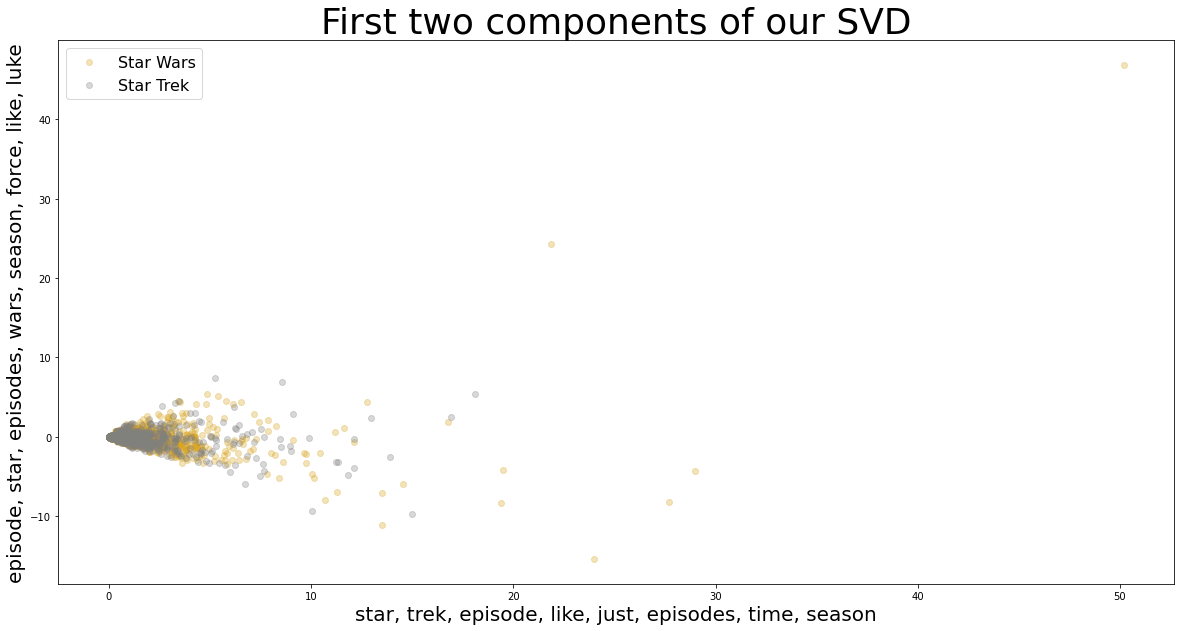

In [83]:
plt.figure(figsize=(20,10))
plt.scatter(svd_df.component_1[submissions['subreddit']==1], svd_df.component_2[submissions['subreddit']==1], c='goldenrod', alpha=.3)
plt.scatter(svd_df.component_1[submissions['subreddit']==0], svd_df.component_2[submissions['subreddit']==0], c='grey', alpha=.3)
plt.xlabel(f"{', '.join(loadings.sort_values('abs_component_1',ascending=False).head(8)[['component_1']].index)}",
          fontsize=20)
plt.ylabel(f"{', '.join(loadings.sort_values('abs_component_2',ascending=False).head(8)[['component_2']].index)}",
          fontsize=20)
plt.title('First two components of our SVD', fontsize=36)
plt.legend(['Star Wars', 'Star Trek'], fontsize=16)
plt.savefig('./images/components.png')

**Always Evaluate Your Model**

In [69]:
def nice_conmat(y_test, preds, classes):

    conmat = confusion_matrix(y_test, preds)
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actual '+ class_ for class_ in classes])

In [70]:
# build a function to print out a nice confusion matrix
preds = gs.best_estimator_.predict(X_test)

nice_conmat(y_test, preds, ['Star Trek', 'Star Wars'])

Accuracy Score: 0.93125


,Predicted Star Trek,Predicted Star Wars
Actual Star Trek,332,46
Actual Star Wars,9,413


In [71]:
#coefficients

coefficients = gs.best_estimator_.named_steps['logreg'].coef_[0]

In [72]:
# re-creating our features variable:
# btw, if your code is too long, you can use a \ like below:

features = ['word_count', 'sentiment_score'] +\
gs.best_estimator_.named_steps['features'].transformer_list[1][1].named_steps['cvec'].get_feature_names()

# no changes to our coefficient variable:
# I'm just bringing it down here
coefficients = gs.best_estimator_.named_steps['logreg'].coef_[0]

In [73]:
coef_df = pd.DataFrame({'features': features, 
              'coef' : coefficients,
              'exp_coef': [np.exp(coef) for coef in coefficients] #exponentiated coefficients
             })

coef_df

,features,coef,exp_coef
0,word_count,-2.147881,0.116731
1,sentiment_score,-0.070870,0.931583
2,00,0.089374,1.093489
3,000,-0.000305,0.999695
4,005,0.008051,1.008084
...,...,...,...
14177,zones,0.113459,1.120145
14178,zoom,0.215629,1.240643
14179,zooms,0.000010,1.000010
14180,zora,-0.000001,0.999999


In [74]:
coef_df.loc[coef_df['features'] == 'sentiment']

,features,coef,exp_coef
11108,sentiment,-1.991119e-07,1.0


In [75]:
coef_df = coef_df.set_index('features')
coef_df = coef_df.sort_values('exp_coef', ascending = False)

In [76]:
coef_df.tail(20)

,coef,exp_coef
features,,
janeway,-1.069570,0.343156
mirror,-1.112580,0.328710
starship,-1.116463,0.327436
lt,-1.137661,0.320568
worf,-1.148620,0.317074
riker,-1.151218,0.316251
dis,-1.231898,0.291738
federation,-1.244195,0.288173
captain,-1.370373,0.254012


In [77]:
coef_df['exp_coef'].tail(10).sort_values()

features
trek          0.015224
discovery     0.071814
tng           0.092530
enterprise    0.100602
word_count    0.116731
ds9           0.118993
voyager       0.159261
picard        0.163376
klingon       0.217645
borg          0.233503
Name: exp_coef, dtype: float64

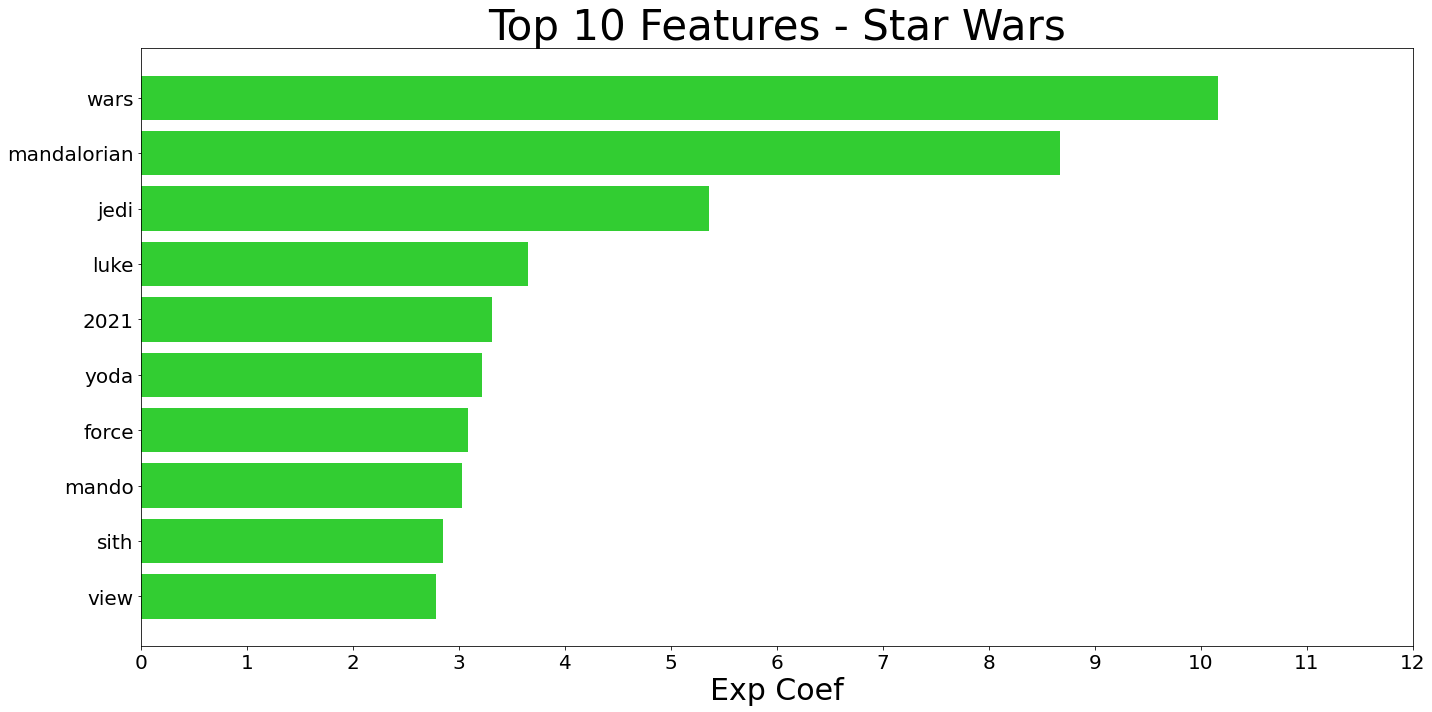

In [84]:
weights = coef_df['exp_coef'].head(10).sort_values()
labels = weights.index

plt.figure(figsize=(20,10))
plt.barh(labels, weights, color = 'limegreen')
plt.yticks(fontsize=20)
plt.xticks(ticks= range(13), fontsize=20)
plt.xlabel('Exp Coef', fontsize=30)
plt.title(f'Top 10 Features - Star Wars', fontsize=42)
plt.tight_layout()
plt.savefig('./images/starwarsfeats.png')

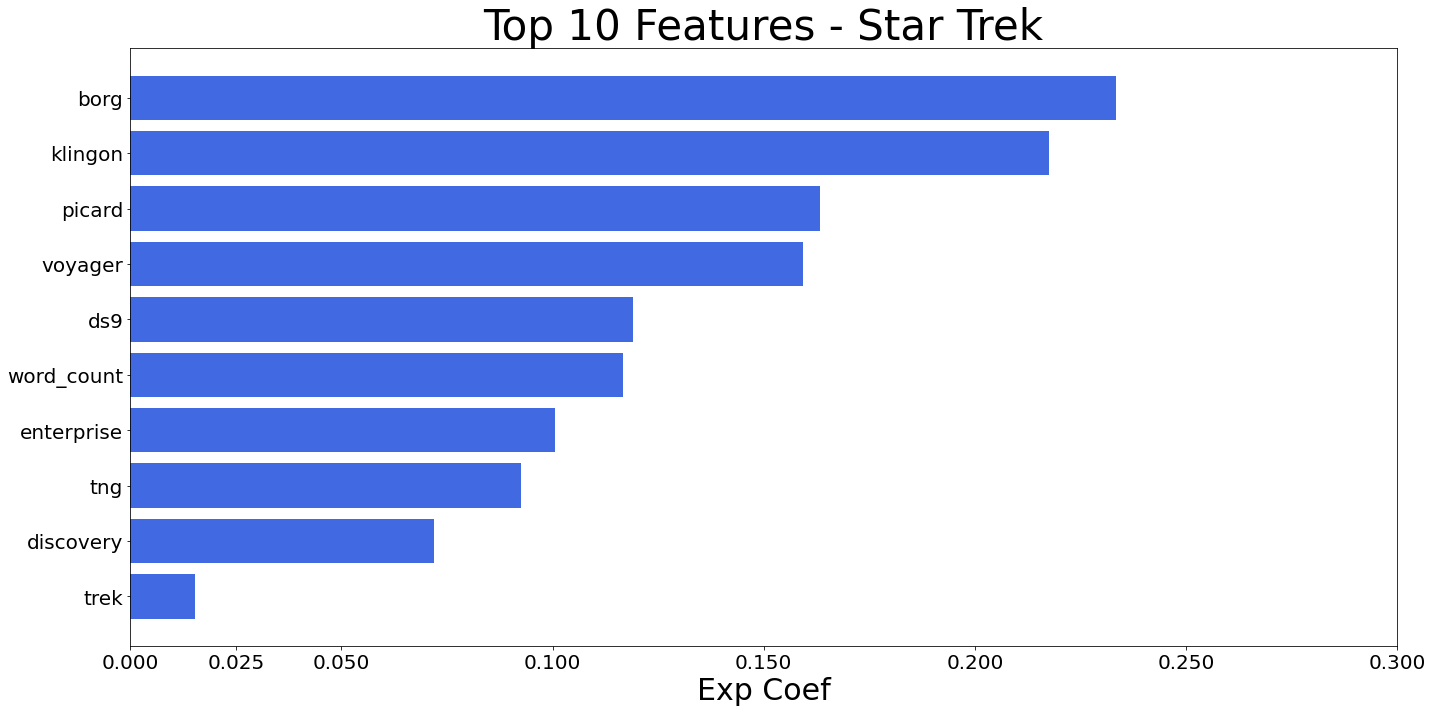

In [85]:
weights = coef_df['exp_coef'].tail(10).sort_values()
labels = weights.index

plt.figure(figsize=(20,10))
plt.barh(labels, weights, color = 'royalblue')
plt.yticks(fontsize=20)
plt.xticks(ticks= [0, 0.025,0.05,0.1, 0.15, 0.2, 0.25, 0.3] , fontsize=20)
plt.xlabel('Exp Coef', fontsize=30)
plt.title(f'Top 10 Features - Star Trek', fontsize=42)
plt.tight_layout()
plt.savefig('./images/startrekfeats.png')

In [80]:
coef_df

,coef,exp_coef
features,,
wars,2.318443,10.159843
mandalorian,2.159537,8.667122
jedi,1.678141,5.355592
luke,1.295013,3.651043
2021,1.196815,3.309559
...,...,...
word_count,-2.147881,0.116731
enterprise,-2.296587,0.100602
tng,-2.380224,0.092530


In [81]:
# <a href="https://masterbundles.com/downloads/free-star-wars-google-slides-theme/">Free Star Wars Google Slides Theme – 7 Slides</a>. Distributed by MasterBundles.